#  t-distributed stochastic neighbor embedding (t-SNE)

In [1]:
import numpy as np
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns

Lade MNIST Digits

In [2]:
digits = load_digits()
print(f'Digits shape: {digits.data.shape}')
# print(digits['DESCR'])

Digits shape: (1797, 64)


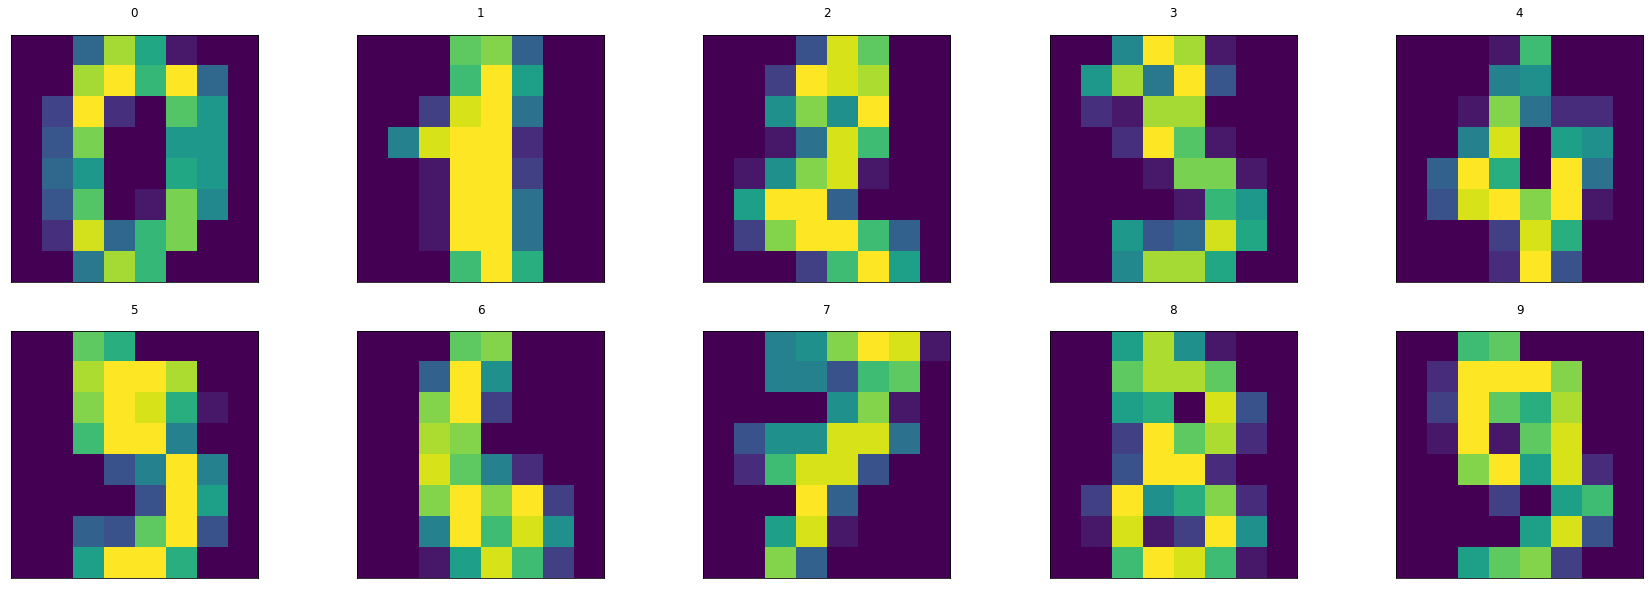

In [3]:
nrows, ncols = 2, 5
fig, axs = plt.subplots(2,5, figsize=(30,10))

for i in range(nrows):
    for j in range(ncols):
        axs[i,j].matshow(digits.images[i*5 + j,...])
        axs[i,j].set(xticks=[], yticks=[])
        axs[i,j].set_title(digits.target[i*5 + j])

`digits` enthält sowohl die Daten der Ziffern (`digits.data`), als auch die echten Target-Labels (`digits.target`):

In [4]:
print(f'Shapes: Data-{digits.data.shape}, Target-{digits.target.shape}')

Shapes: Data-(1797, 64), Target-(1797,)


Wenden wir jetzt t-SNE auf den Datensatz an und versuchen eine Dimensions-Reduktion von $\mathbb{R}^{64}$ auf $\mathbb{R}^{2}$:

In [5]:
tsne = TSNE(n_components=2, random_state=42).fit_transform(digits.data)

In [6]:
def scatter(x, colors=None):
    palette = np.array(sns.color_palette("cubehelix", 10))
    target_colors = colors if type(colors) is np.ndarray else np.ones(x.shape[0])
    
    # We create a scatter plot.
    f = plt.figure(figsize=(10, 10))
    ax = plt.subplot(aspect='equal')
    alpha = 0.5 if x.shape[0] < 5000 else 0.1
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[target_colors.astype(np.int)], alpha=alpha)
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('tight')

    txts = []
    # We add the labels for each digit.
    if type(colors) is np.ndarray:
        for i in range(10):
            # Position of each label.
            xtext, ytext = np.median(x[colors == i, :], axis=0)
            txt = ax.text(xtext, ytext, str(i), fontsize=16)
            txt.set_path_effects([
                PathEffects.Stroke(linewidth=5, foreground="w"),
                PathEffects.Normal()])
            txts.append(txt)

    return f, ax, sc, txts

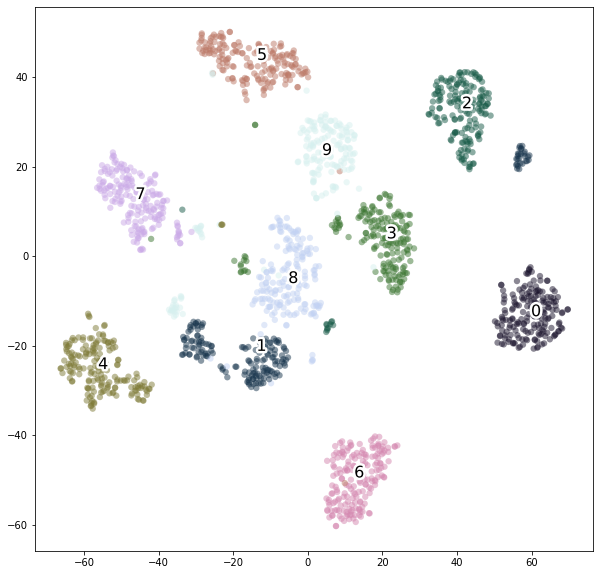

In [7]:
scatter(tsne, digits.target);

Die Einfärbung hilft uns, die Cluster zu differenzieren. In monochrom ist es nicht ganz so einfach:

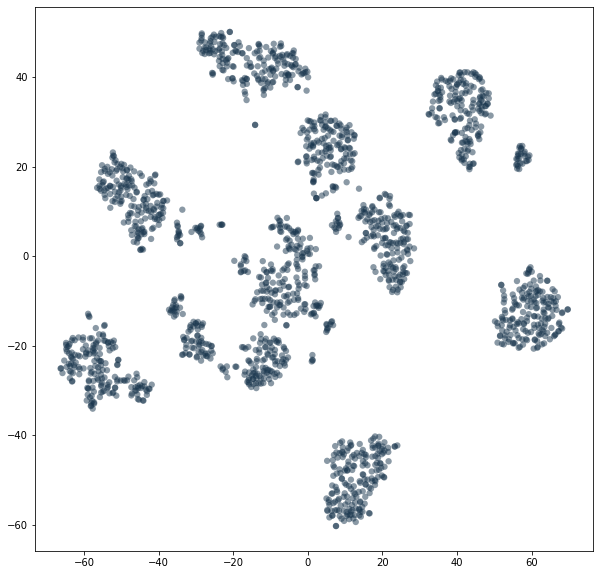

In [8]:
scatter(tsne);

Was macht denn DBSCAN daraus?

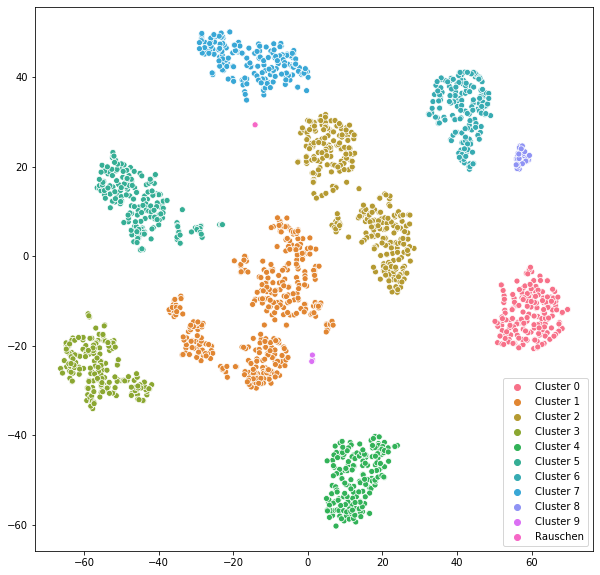

In [9]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=5, min_samples=4).fit(tsne)
def plot(data, labels):
    fig, ax = plt.subplots(1, figsize=(10,10))
    sns.scatterplot(data[:,0], data[:,1], hue=["Rauschen" if x < 0 else "Cluster {}".format(x) for x in labels], ax=ax);
    
plot(tsne, db.labels_)

Schauen wir mal, wie der Algorithmus mit unseren "hochaufgelösten" Bildern umgeht...

In [10]:
train = pd.read_csv('./data/mnist/train.csv')
target = train.label
train = train.drop("label",axis=1)
m,n = train.shape
print(f'Wir haben {m} Datenpunkte mit {n} Features')

Wir haben 42000 Datenpunkte mit 784 Features


In [11]:
%time tsne = TSNE(n_components=2, random_state=42).fit_transform(train)

CPU times: user 44min 49s, sys: 3.25 s, total: 44min 52s
Wall time: 33min 8s


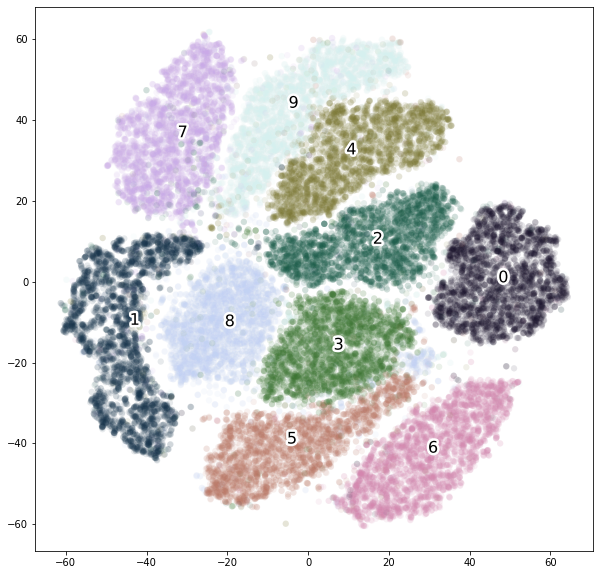

In [15]:
scatter(tsne, np.asarray(target));

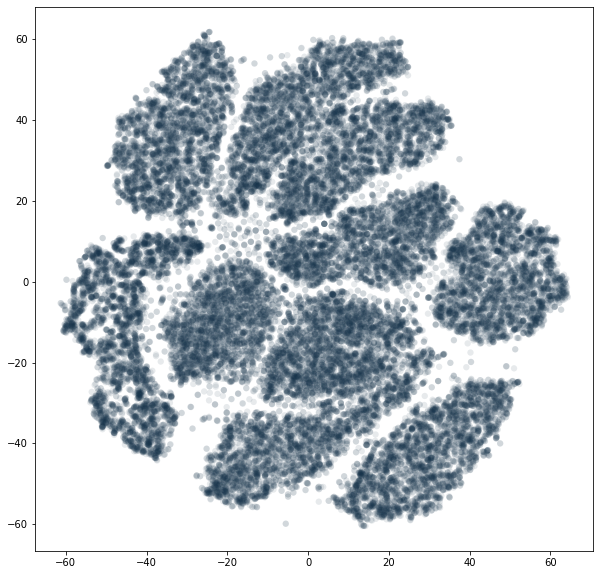

In [16]:
scatter(tsne);